# Complex Networks

## Infectious Disease Spreading

In this project we choosed a real-world dataset about disease spreading and analyze it.
The dataset can be found in http://sing.stanford.edu/flu/

### 1. Data Set Integration

We start by loading the dataset and transform it into a graph with networkx (https://networkx.github.io/documentation/stable/index.html).

In order to transform the dataset into a graph its important to understand what's inside it.

The population is composed by an entire school, representing 655 students, 73 teachers, 55 staff, and 5 other persons.
It contains 2,148,991 unique close proximity records (CPRs). A CPR represents one close (maximum of 3 m) proximity detection event between two motes. Thus, a contact exists between two motes if there is at least one interaction between them during the day, and the duration of the contact is the total duration of all interactions between these two motes. Because the beaconing frequency of a mote is 0.05 s−1, an interaction of length 3 (in CPRs) corresponds to an interaction of about 1 min (SI Text and references therein). The entire dataset consists of 762,868 interactions with a mean duration of 2.8 CPRs (∼1 min), or 118,291 contacts with mean duration of 18.1 CPRs (∼6 min).

The aggregate network for the entire day can be represented by a weighted undirected graph, wherein nodes represent indi- viduals and edges represent contacts (edges are weighted by contact duration).

### Nodes
Getting the nodes is easy and very straight forward.


In [21]:
import os
import networkx as nx

dataset = "flu-data" # corpora

print(os.listdir(dataset)) # files that contain the dataset info

roles_file = open(dataset + "/roles.txt", 'r')
roles = []

for line in roles_file:
    id = int(line.split()[0])
    role = line.split()[1]
    roles.append((id, role))

roles = sorted(roles, key=lambda id: id)[12:] # the first 12 elements have the same ID?! 
population_size = len(roles) # eliminating the first 12 entries we get 789 roles shouldn't be 788 ?(655 + 73 + 55 + 5)


# NODES in the network correspond to each subject ID.
network = nx.Graph()
for i in range(1, population_size+1):
    network.add_node(i)


['.DS_Store', 'edgeLists', 'moteFiles', 'README.txt', 'roles.txt']


---

#### Edges:        

The four folders correspond to four strategies of calculating interactions or contacts from a set of CPRs (recall that an interaction between two motes is defined as a continuous sequence of CPRs, and a contact is the sum of all interactions). There are two parameters that are of importance: minimumDuration and dropoff. The parameter minimumDuration defines the minimum duration (in CPRs) for an interaction or contact (depending on the strategy - see below) to be considered. The dropoff parameter allows you to assume that the dataset might be missing CPRs, and dropoff allows you to define the number of CPRs that should be considered as a maximum dropoff value. The examples below should make this clear.

The for strategies are:
    - addThenChop
    - chopThenAdd
    - chopThenCount
    - justChop
    
Note: the deafult values of minimumDuration and dropoff are 1 and 0 respectively

Having said this, let's now consider two motes, id1 and id2. Assume that in the data, we find they they had CPRs at the following time steps:

1 
3 
4 
5 
8 
9 
10 
12 
23 
24 
25 
26 
28 
103 
112 
113 
114 
266 
267 
268 
269 
270

i.e. a total of 22 CPRs.

Here's the what the four strategies return by default (minimumDuration = 1, dropoff = 0):

addThenChop:
1	2	22

chopThenAdd:
1	2	22

chopThenCount:
1	2	9

justChop:

1	2	1

1	2	3

1	2	3

1	2	1

1	2	4

1	2	1

1	2	1

1	2	3

1	2	5


In [22]:
parameters_path = '/dropoff=0/minimumDuration=1/deltaT=1620/staticWeightedEdgeList_at=1350_min=540_max=2159.txt'

addThenChop_path = dataset + '/edgeLists/durationCondition/' + 'addThenChop' + parameters_path
chopThenAdd_path = dataset + '/edgeLists/durationCondition/' + 'chopThenAdd' + parameters_path
chopThenCount_path = dataset + '/edgeLists/durationCondition/' + 'chopThenCount' + parameters_path
justChop_path = dataset + '/edgeLists/durationCondition/' + 'justChop' + parameters_path

def retrieveEdges(strategy_path, graph):
    strategy_file = open(strategy_path , 'r')
    #starting with addThenChop strategy to define the edges.
    edges = []
    for line in strategy_file:
        id1 = int(line.split()[0])
        id2 = int(line.split()[1])
        weight = int(line.split()[2])
        edges.append((id1, id2, weight))

    graph.add_weighted_edges_from(edges) # add edges to the network with corresponding weights.

retrieveEdges(addThenChop_path, network)
links = len(network.edges())


### 2. Network characteristics Analisys:

There is many metric to characterize a network.
In this section we explore some of them.

### Degree distribution:


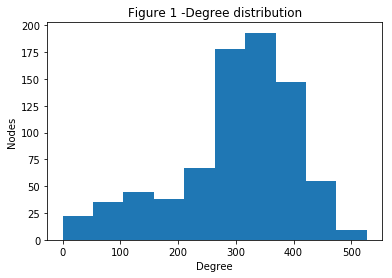

In [83]:
import numpy as np
import matplotlib.pyplot as plt

def plotDegreeHistogram(network):
    degree = nx.degree(network)
    plt.hist(list(degree.values()))
    plt.xlabel("Degree")
    plt.ylabel("Nodes")
    plt.title("Figure 1 -Degree distribution")
    plt.show()

plotDegreeHistogram(network=network)

Looking to the figure 1 the degree distribution of the contact network shows that there is a big number of nodes with ≈ 280 to ≈ 420 neightbors and a low density of nodes with more links.

Big Hubs are super rare and low degree nodes are also rare.

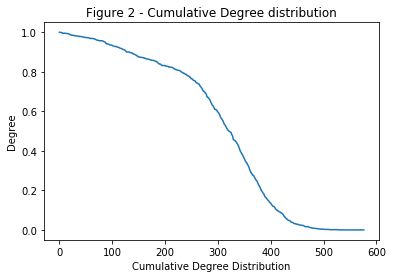

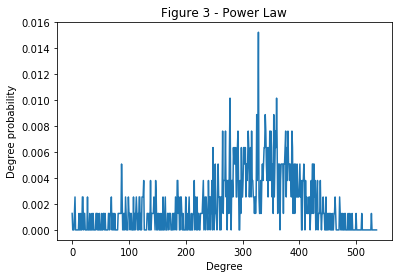

In [113]:
# cumulative degree distribution, the fraction of nodes with degree higher than k
def plotCumulativeDist(network):
    degree = nx.degree(network)
    max_degree = max(degree.values())
    
    cum_Pk = [0]*(max_degree+50) # + 50 so we can see the limit going to zero.
    k_values = [0]*(max_degree+50)
    for k in range(0, max_degree+50):
        k_values[k] = k
        cum_Pk[k] = len([i for i in degree.values() if i >= k]) / len(network.nodes())
    
    plt.xlabel("Cumulative Degree Distribution")
    plt.ylabel("Degree")
    plt.title("Figure 2 - Cumulative Degree distribution")
    plt.plot(k_values, cum_Pk)
    plt.show()
    
            
plotCumulativeDist(network)

def powerLawPlot(network):
    degree = nx.degree(network)
    max_degree = max(degree.values())
    
    Pk = [0]*(max_degree+10) # + 10 so we can see the limit going to zero.
    k_values = [0]*(max_degree+10)
    for k in range(0, max_degree+10):
        k_values[k] = k
        Pk[k] = len([i for i in degree.values() if i == k]) / len(network.nodes())
    
    plt.xlabel("Degree")
    plt.ylabel("Degree probability")
    plt.title("Figure 3 - Power Law")
    plt.plot(k_values, Pk)
    plt.show()

"""
degree_sequence=sorted(nx.degree(network).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)
plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")
plt.show()
"""

powerLawPlot(network) #NOT WHATS IS EXPECTED....
#plt.title("Figure 2 - Cumulative Degree distribution")


In [19]:

#nx.draw_networkx(network)
#plt.show()